In [1]:
import InfBot as ib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# simple test

In [2]:
import importlib
importlib.reload(ib)

<module 'InfBot' from '/media/pang/Samsung_T5/Documents_backup/Python_home/GitHub/Information Bottleneck/InfBot.py'>

In [42]:
np.random.seed(42)
X = np.random.binomial(n= 1,p=0.7,size = 1000) # random binomial
Y = np.random.binomial(n= 1,p=0.4,size = 1000)

In [66]:
ibtest = ib.IB(beta = 10000,check_result=True,log_basis=2)
ibtest.fit(X,Y)

In [67]:
ibtest.track['I_yz'][-5:]

[0.001473573328379699, 0.0014764585856833993, 0.0014764585856833993]

In [68]:
ibtest.I_xy

0.0014764585856833993

In [69]:
ibtest.track['I_xz'][-5:]

[0.8616848369936563, 0.8660821820183902, 0.8660821820183902]

In [51]:
from sklearn.metrics import mutual_info_score

In [57]:
mutual_info_score(X,Y)

0.0010235230834146347

In [9]:
ibtest.track

{'I_yz': [0.00021262399846713178,
  0.00044439997867965625,
  0.0004444583208136595,
  0.00044445832081479834],
 'I_xz': [0.11307080376957336,
  0.2605996552735405,
  0.26071671351616316,
  0.26071671351851927]}

In [10]:
ibtest.pz_x

array([[9.99999999e-01, 1.74708187e-10],
       [9.00041766e-10, 1.00000000e+00]])

In [11]:
ibtest.initialize_z()
print(ibtest.pz_x.sum())
pz_x = ibtest.pz_x
pz_x,_,_ = ibtest.update(ibtest.pz_x,ibtest.pz,ibtest.py_z)
pz_x.sum(0)

2.0


array([1., 1.])

Theoretically, $I(Y,Z) = I(X,Y)$ when $\beta \to \infty$ 

# With MNIST data

We porcess with binarya image : pixel=0,1 if there is no pixel used

In [12]:
# data (MNIST)
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

In [13]:
X_proc = np.where(X>5,1,0)

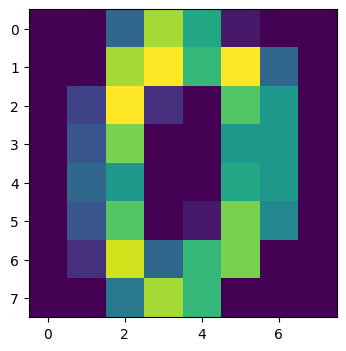

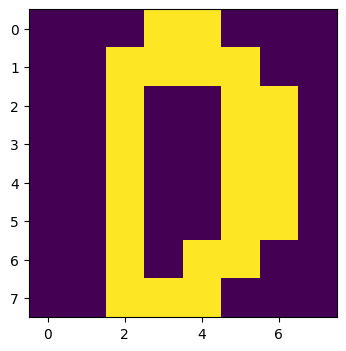

In [14]:
im_num = 0
plt.imshow(X[im_num].reshape((8,8)))
plt.show()
plt.imshow(X_proc[im_num].reshape((8,8)))
plt.show()

In [15]:
x_data =[]
y_data = []
for i,image in enumerate(X_proc):
    for j,pixel in enumerate(image):
        if pixel!=0:
            x_data.append(j)
            y_data.append(y[i])

In [16]:
y_data = np.array(y_data)
x_data = np.array(x_data)

In [17]:
import importlib
importlib.reload(ib)

<module 'InfBot' from '/media/pang/Samsung_T5/Documents_backup/Python_home/GitHub/Information Bottleneck/InfBot.py'>

In [18]:
ib_mnist = ib.IB(beta=250,dim_hidden=10,seed=42,check_result=True)
ib_mnist.fit(x_data,y_data)

In [19]:
ib_mnist.I_xy

0.07083367359859546

In [20]:
ib_mnist.pz_x.sum(0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [21]:
ib_mnist.pz.sum()

1.0

In [22]:
print('I(Z,X)',ib_mnist.track['I_xz'])
print('I(Z,Y)',ib_mnist.track['I_yz'])

I(Z,X) [0.04155770260013752, 0.40703618066911385, 0.7946800882758654, 0.870593840060639, 0.8896452430387961, 0.8918378900383631, 0.8992482365850898, 0.9020403731924751, 0.9094739259704372, 0.9064465563731576, 0.9048742206832474, 0.9011289382007546, 0.9009653083275626, 0.9087728739611073, 0.909298731309891, 0.9096828448125137, 0.9104630803352756, 0.9111731340034543, 0.9115565511726684, 0.9116942593370948, 0.9117275619705523, 0.9117299832926715, 0.9117263419360511, 0.9117229093612294, 0.9117206418106172, 0.9117193123695976, 0.9117185766295287, 0.9117181829474406, 0.9117179769144819, 0.911717870773435, 0.911717816733209, 0.9117177894683521, 0.9117177758108669, 0.9117177690089178, 0.9117177656371424, 0.911717763972158]
I(Z,Y) [0.00289961681633904, 0.021474588754562984, 0.03780025425759905, 0.04263105412408425, 0.04320157544945246, 0.04334051801149902, 0.043796717024392466, 0.04441247884174272, 0.044841486713771944, 0.045003915596043324, 0.045068144014013024, 0.045101190122872545, 0.0453372

In [23]:
ib_mnist.px.shape

(55,)

In [24]:
ib_mnist.px.sum()

1.0

In [25]:
np.max(ib_mnist.px_z[:,0])

0.3932930904757226

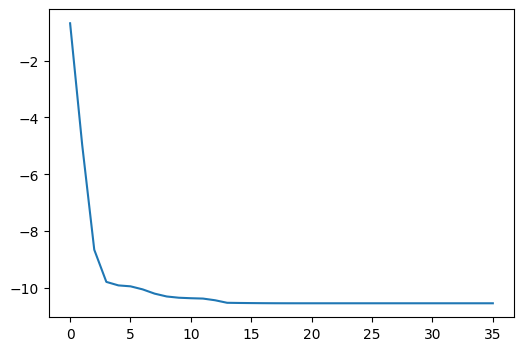

In [26]:
plt.plot(ib_mnist.L)

In [27]:
# from sklearn.preprocessing import KBinsDiscretizer as kbd
# from scipy.sparse import csr_matrix
# X_bined = kbd(n_bins=10,strategy='quantile',encode='ordinal').fit_transform(X)

## Let's see the most influent pixel for predicting a number

In [28]:
np.max(ib_mnist.py_z,axis=0)

array([0.18605153, 0.17081161, 0.14005499, 0.15657728, 0.14844902,
       0.2086397 , 0.23021667, 0.14285734, 0.13838535, 0.11018905])

In [29]:
ib_mnist.py_z[:,6]

array([0.19470046, 0.07387338, 0.03918919, 0.01591866, 0.23021667,
       0.06243833, 0.17061127, 0.0930548 , 0.10204253, 0.0179547 ])

For example, we have : $P(Y=4|Z=6) = 0.23$  
It means that for predicting the number 4, the most relevant group is the 6th.
Thus we look at the distribution $P(X|Z=6)$.  
In the same manner, I look for 5 most 'probable latent groups Z' explaining the digit 4.

In [30]:
nb_groups = 10

In [31]:
probas_index = np.argsort(-ib_mnist.py_z[4,:])
probas_index5 = probas_index[:nb_groups]

In [32]:
x_supp = np.unique(x_data)
number_rpz = np.zeros((64,nb_groups))
px_6 = ib_mnist.px_z[:,probas_index5]
for i,x in enumerate(x_supp):
    number_rpz[x,:] = px_6[i]

In [33]:
# Summing probabilites of all latent group.
# It is meaningfull since the most probable explain the image
number_rpz_sum = number_rpz.sum(axis=1)

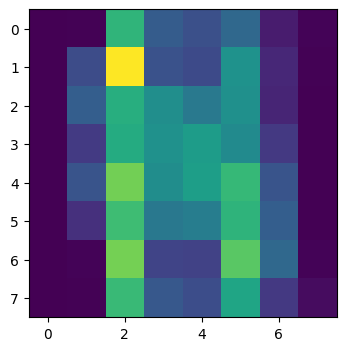

In [34]:
plt.imshow(number_rpz_sum.reshape((8,8)))
plt.show()

Iteratively :

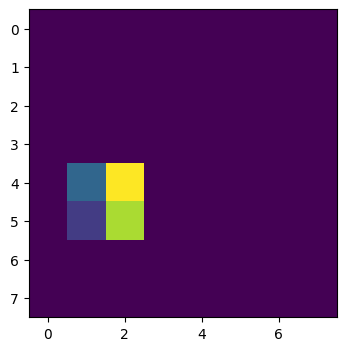

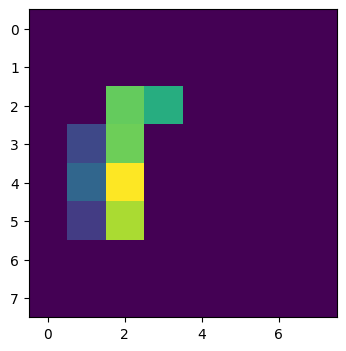

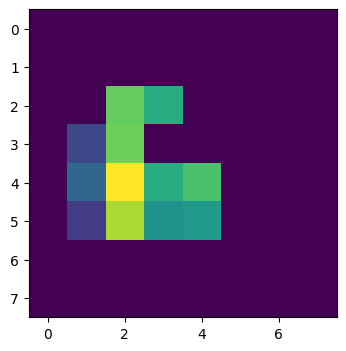

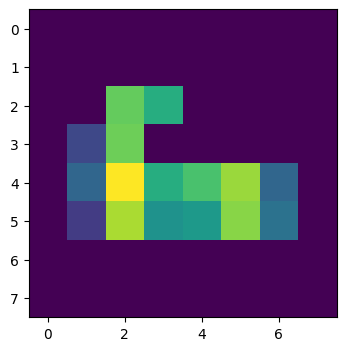

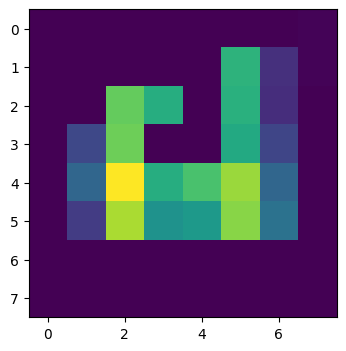

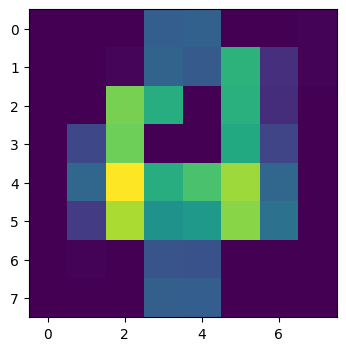

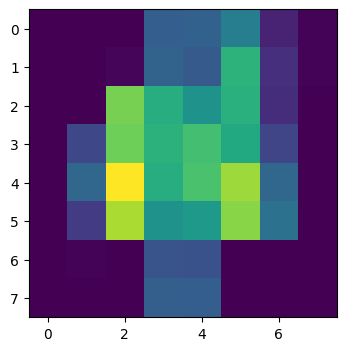

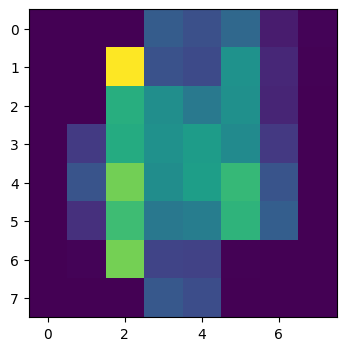

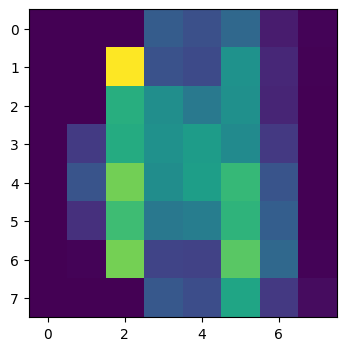

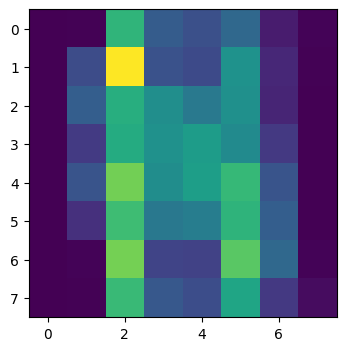

In [35]:
number_rpz_cumsum = np.cumsum(number_rpz,axis=1)
for i in range(number_rpz_cumsum.shape[1]):
    plt.imshow(number_rpz_cumsum[:,i].reshape((8,8)))
    plt.show()

# With Gaussian data

To do after

In [214]:
x_norm = np.random.normal(0,1,y.shape[0])

In [215]:
x_norm_bined = kbd(encode='ordinal',strategy='uniform').fit_transform(x_norm.reshape((-1,1)))
x_norm_bined = x_norm_bined.reshape(-1)

NameError: name 'kbd' is not defined

In [ ]:
plt.hist(x_norm_bined)